In [ ]:
import io

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

file_path = "files/mars-2014-complete.csv"

#main goal is finding out whether the data is compatible with the EU data
#taking care of issues in encoding caused by some special signs in the french language
#first open the data and replace the errors, then read the data through the io library's function.
with open(file_path, encoding="utf-8", errors="replace") as f:
    data = f.read()
df = pd.read_csv(io.StringIO(data), sep=";")
df.head()
#the columns in general closely resemble those of the recent EU dataset.

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


In [15]:
df.describe()

,puiss_admin_98,conso_urb,conso_exurb,conso_mixte,co2,masse_ordma_min,masse_ordma_max
count,55044.000000,6124.000000,4545.000000,6496.000000,55010.000000,55044.000000,55044.000000
mean,10.551504,9.157087,6.853245,7.823584,201.707035,2102.104553,2341.021801
std,5.126021,1.726000,1.080916,1.040802,33.976278,294.731715,424.067895
min,1.000000,0.000000,3.000000,3.000000,13.000000,825.000000,825.000000
25%,9.000000,8.000000,7.000000,8.000000,193.000000,1982.000000,2075.000000
50%,10.000000,9.000000,7.000000,8.000000,205.000000,2076.000000,2355.000000
75%,10.000000,10.000000,7.000000,8.000000,216.000000,2246.000000,2709.000000
max,81.000000,23.000000,10.000000,17.000000,572.000000,2760.000000,3094.000000


In [ ]:
df.info()
#some numerical data is of the object data in this data. I couldn't find a particular reasoning for this.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lib_mrq            55044 non-null  object 
 1   lib_mod_doss       55044 non-null  object 
 2   lib_mod            55044 non-null  object 
 3   dscom              55044 non-null  object 
 4   cnit               55044 non-null  object 
 5   tvv                55044 non-null  object 
 6   cod_cbr            55044 non-null  object 
 7   hybride            55044 non-null  object 
 8   puiss_admin_98     55044 non-null  int64  
 9   puiss_max          55044 non-null  object 
 10  typ_boite_nb_rapp  55044 non-null  object 
 11  conso_urb          55001 non-null  object 
 12  conso_exurb        55001 non-null  object 
 13  conso_mixte        55010 non-null  object 
 14  co2                55010 non-null  float64
 15  co_typ_1           54886 non-null  object 
 16  nox                548

In [ ]:

missing_counts = df.isna().sum()
missing_percentage = missing_counts / len(df)
print(missing_percentage)
#most columns have very low missing values, except for the "Unnamed" empty columns, that were generated due to UTF 8 issues with some french signs.

lib_mrq              0.000000
lib_mod_doss         0.000000
lib_mod              0.000000
dscom                0.000000
cnit                 0.000000
tvv                  0.000000
cod_cbr              0.000000
hybride              0.000000
puiss_admin_98       0.000000
puiss_max            0.000000
typ_boite_nb_rapp    0.000000
conso_urb            0.000781
conso_exurb          0.000781
conso_mixte          0.000618
co2                  0.000618
co_typ_1             0.002870
hc                   0.822451
nox                  0.002870
hcnox                0.179638
ptcl                 0.048652
masse_ordma_min      0.000000
masse_ordma_max      0.000000
champ_v9             0.001108
date_maj             0.941011
Carrosserie          0.000000
gamme                0.000000
Unnamed: 26          1.000000
Unnamed: 27          1.000000
Unnamed: 28          1.000000
Unnamed: 29          1.000000
dtype: float64


In [ ]:
#thanks to Philipp, I took his code - dropping columns with more than 70% missing data
del_threshold = 0.7
cols_to_be_dropped = list()

for col, percentage in missing_percentage.items():
    if percentage > del_threshold:
        cols_to_be_dropped.append(col)

print(f"Removing: {cols_to_be_dropped}")
df = df.drop(columns=cols_to_be_dropped)

Removing: ['hc', 'date_maj', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29']


In [ ]:
df.head(5)

In [ ]:
#we now want to see correlations for the co2 emission for a basic understanding. but some relevant variables - those for fuel expendage - are not in number format.
column_names = ['conso_urb', 'conso_exurb', 'conso_mixte']

for column in column_names:
        df[column] = pd.to_numeric(df[column], errors='coerce')

df_numeric = df.select_dtypes(include=['number'])
correlations = df_numeric.corr()
print(correlations['co2'])
#the conso-variables have a very high correlation, to the point of redundance. the mixte, the average variable of the other two, is the highest one.

puiss_admin_98     0.463154
conso_urb          0.927157
conso_exurb        0.967513
conso_mixte        0.973868
co2                1.000000
masse_ordma_min    0.643665
masse_ordma_max    0.540156
Name: co2, dtype: float64


In [ ]:
#after a half-way team meeting, Philipp and Leonel presented a reduced dataset of the EU origin, with only the most important explanatory variables remaining, to remove unnecessary data.
#I tried to match the variables to my french dataset as close as I could and kept only the most compatible columns. 
compatible_with_eu_columns = ["gamme", "Carrosserie", "masse_ordma_max", "masse_ordma_min", "co2", "cod_cbr", "hybride", "puiss_admin_98", "puiss_max", "conso_urb", "conso_exurb", "conso_mixte"]
df = df[compatible_with_eu_columns].copy()
df.head()

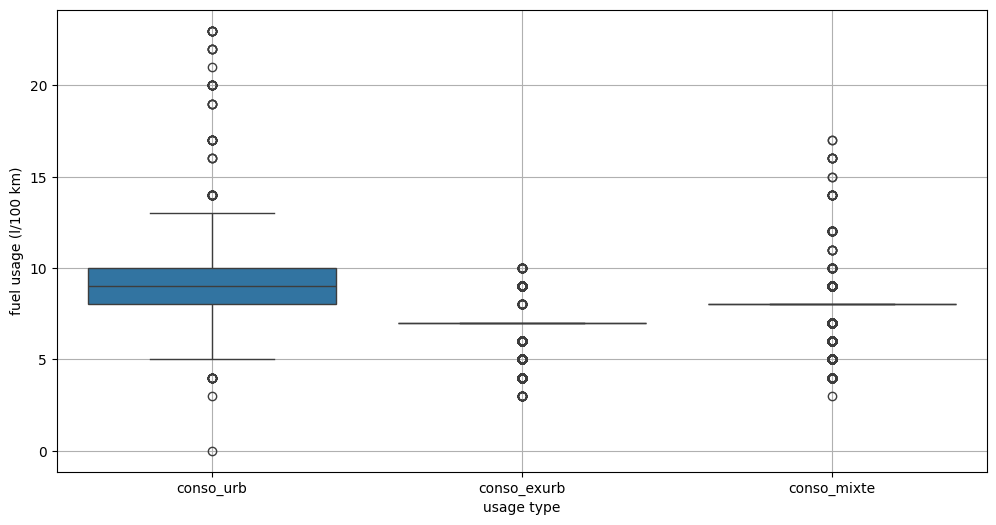

In [ ]:

#now we create a plot to compare the different fuel usage variables, see if they behave as expected

column_names = ['conso_urb', 'conso_exurb', 'conso_mixte']

for column in column_names:
        df[column] = pd.to_numeric(df[column], errors='coerce')

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['conso_urb', 'conso_exurb', 'conso_mixte']])
plt.ylabel('fuel usage (l/100 km)')
plt.xlabel('usage type')
plt.grid(True)
plt.show()

#urban usage is higher, has many outliers. as expected from urban scenarios with lots of stop-and-go
#ex-urban usage is lower and more centralized in general
#mixed usage seems (at least close to) the mean of the other two variables
#everything seems pretty much as expected, so we can reliably use conso_mixte for further analysis


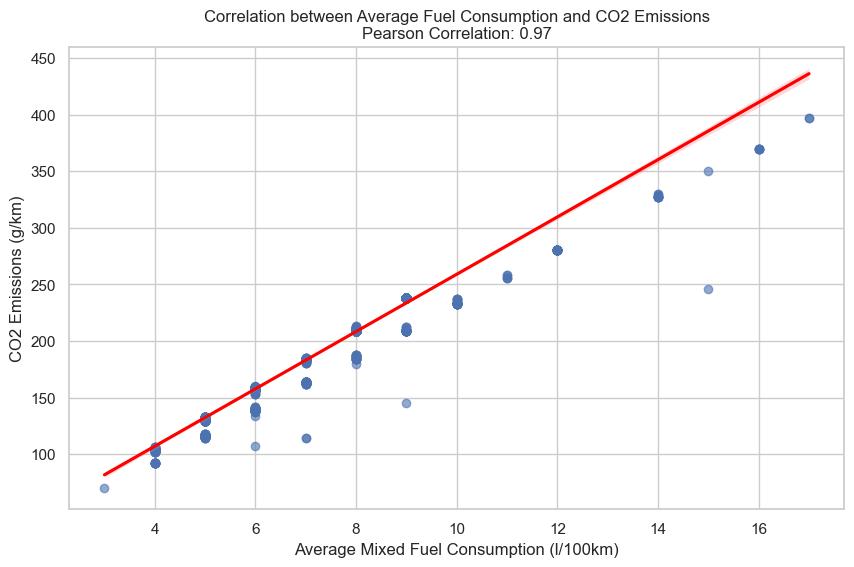

In [ ]:
#now we create plot to see the correlation between fuel consumption and CO2 emission, we use the conso_mixte variable that was confirmed safe for use

sns.set(style="whitegrid")
correlation_coef = df['conso_mixte'].corr(df['co2'])
plt.figure(figsize=(10, 6))
sns.regplot(x='conso_mixte', y='co2', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f'Correlation between Average Fuel Consumption and CO2 Emissions\nPearson Correlation: {correlation_coef:.2f}')
plt.xlabel('Average Mixed Fuel Consumption (l/100km)')
plt.ylabel('CO2 Emissions (g/km)')
sns.set_style("whitegrid")
plt.show()

#the two variables are very close in distribution - as confirmed by the correlation coefficient 0.97 from before already. But now we also have a plot about the topic. 

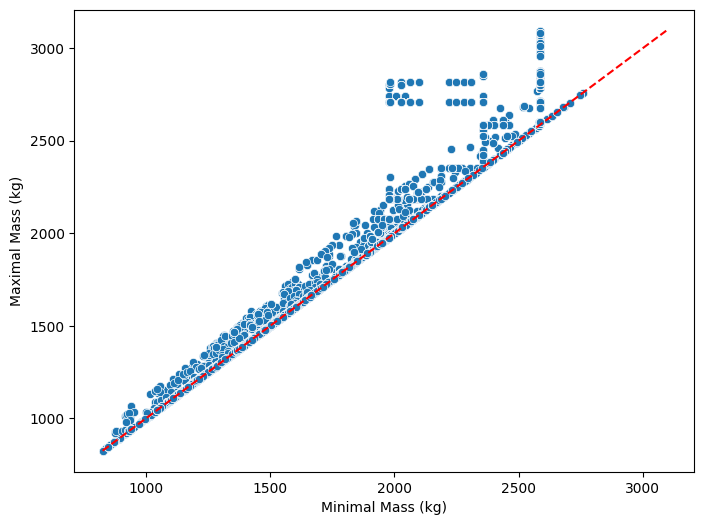

In [ ]:
#This was a plot out of personal interest
#I wanted a plot to see if min & max mass really differ that much - from df.head() it seemed they were always the same and I hoped I could delete one of them safely.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='masse_ordma_min', y='masse_ordma_max', data=df)
plt.xlabel('Minimal Mass (kg)')
plt.ylabel('Maximal Mass (kg)')
plt.plot([df['masse_ordma_min'].min(), df['masse_ordma_max'].max()],
         [df['masse_ordma_min'].min(), df['masse_ordma_max'].max()], 'r--')
plt.show()

#the plot proves my assumption wrong, though, even though they are the same for some cars indeed, the variable values differ for many others.

In [ ]:
#I wanted to check the prevalence of certain fuels. But I couldn't interpret the values, so I had to research.
frequency_cod_cbr = df['cod_cbr'].value_counts()
print("frequency of values in 'cod_cbr':")
print(frequency_cod_cbr)

Häufigkeiten der Werte in 'cod_cbr':
cod_cbr
GO       49311
ES        5169
EH         298
GH          81
EL          34
ES/GN       32
GN/ES       32
GP/ES       23
ES/GP       23
GN          21
FE          10
EE           9
GL           1
Name: count, dtype: int64


In [ ]:
#I also wanted to see, how many hybrid cars were in the data, as the topic of segragation between electric and fossil fuels kept coming up in our team meetings.
frequency_hybride = df['hybride'].value_counts()
print("frequency of values in 'hybride':")
print(frequency_hybride)
#The result: almost no hybrid cars existed in the data - likely to the older data from 2014.

frequency of values in 'hybride':
hybride
non    54655
oui      389
Name: count, dtype: int64


In [ ]:
#Now after my research I wanted to translate the shorthands of fuel types to actually readable names:

renaming_dict = {
    'GO': 'Diesel',
    'ES': 'Petrol',
    'EH': 'Petrol Hybrid',
    'GH': 'Gas Hybrid',
    'EL': 'Electric',
    'ES/GN': 'Petrol and Natural Gas',
    'GN/ES': 'Natural Gas and Petrol',
    'GP/ES': 'LPG and Petrol',
    'ES/GP': 'Petrol and LPG',
    'GN': 'Natural Gas',
    'FE': 'Other Fuel Type',
    'EE': 'Electric Engine',
    'GL': 'Liquefied Gas'
}

df['cod_cbr'] = df['cod_cbr'].replace(renaming_dict)

print(df['cod_cbr'].value_counts())

cod_cbr
Diesel                    49311
Petrol                     5169
Petrol Hybrid               298
Gas Hybrid                   81
Electric                     34
Petrol and Natural Gas       32
Natural Gas and Petrol       32
LPG and Petrol               23
Petrol and LPG               23
Natural Gas                  21
Other Fuel Type              10
Electric Engine               9
Liquefied Gas                 1
Name: count, dtype: int64


C:\Users\T\AppData\Local\Temp\ipykernel_13944\3943937898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="Blues_d")


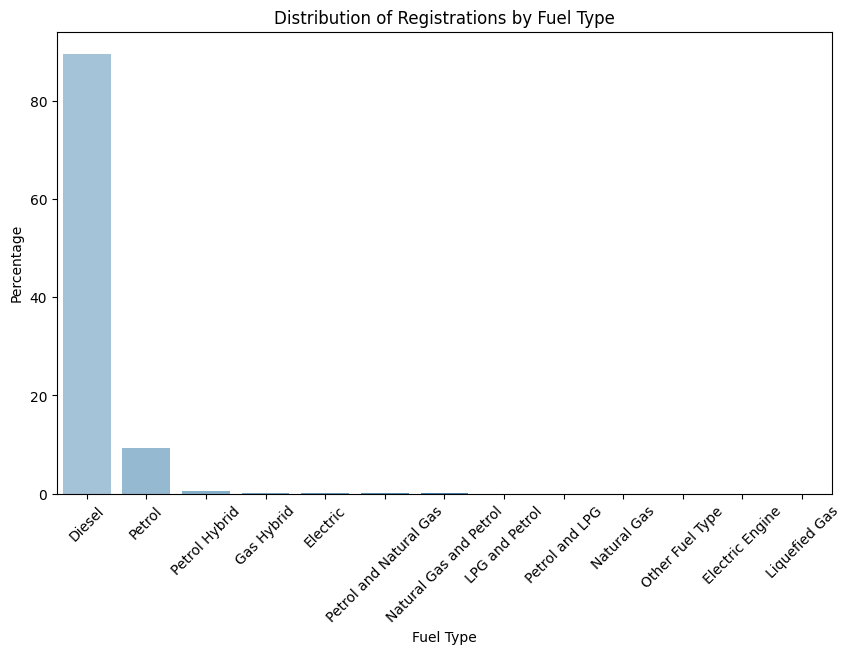

In [ ]:
#I now wanted to do a comparison with the fuel-distribution plot by Richard.
fuel_counts = df['cod_cbr'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="Blues_d")
plt.title('Distribution of Registrations by Fuel Type')
plt.ylabel('Percentage')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.show()
#We see many fossil fuel car registrations - most likely related to the older data (2014) where fossil fuels were more prominent, same as with the hybrid car topic.

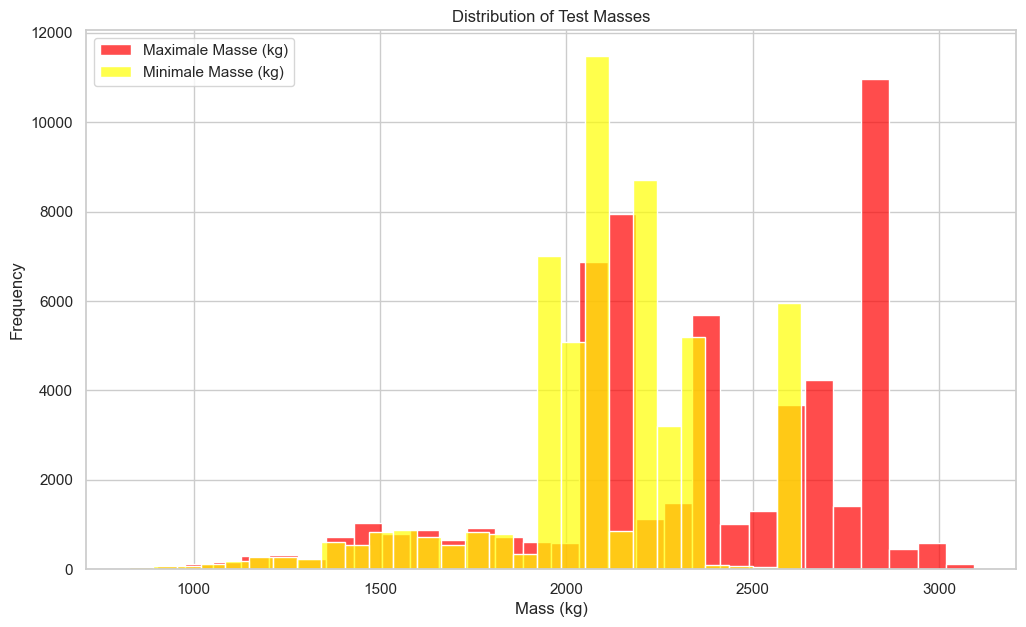

In [ ]:
#In a similar vein, to see if the french & EU data were compatible, I wanted to do a comparison of the mass-distribution, with a plot by Richard.

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
sns.histplot(df['masse_ordma_max'], color="red", label='Maximale Masse (kg)', bins=30, kde=False, alpha=0.7)
sns.histplot(df['masse_ordma_min'], color="yellow", label='Minimale Masse (kg)', bins=30, kde=False, alpha=0.7)
plt.legend()
plt.title('Distribution of Test Masses')
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')

plt.show()
#the highest clustering of minimum mass is at ca. 2000 kg, the highest clustering of maximum mass at ca. 3000 kg.
#so, we see many high test masses in comparison to Richard -again  most likely related to the older data (2014) where due to less advanced building techniques & materials, cars were heavier in general.


In [ ]:
#Despite the graphs showing that the french data does indeed look generally valid and comparable to EU, we ultimately decided not to use the french data. 
#The biggest argument to use it was that it provided data from before 2010, where the EU data sheets did not provide any. In this specific time period though, the french data is far more limited, e.g. doesn’t include vehicle mass at all, one of our most important explanatory variables.
#We concluded that the data from before 2010 thus was less usable to us, and the data from after 2010 (as the one looked at in this notebook) would just produce data noise in our dataset, possibly also introducing unwanted copies of existing car models.